In [87]:
# import data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [88]:
# loading dataset into pandas
df = pd.read_csv("C:/Users/hamup/OneDrive/Desktop/Clustering Countries for Strategic Aid Allocation/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Exploratory Data Analysis

In [89]:
df.shape

(167, 10)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [91]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [92]:
df.describe(include = object)

,country
count,167
unique,167
top,Afghanistan
freq,1


In [93]:
# Checking for missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Insight: There are no missing values in dataset

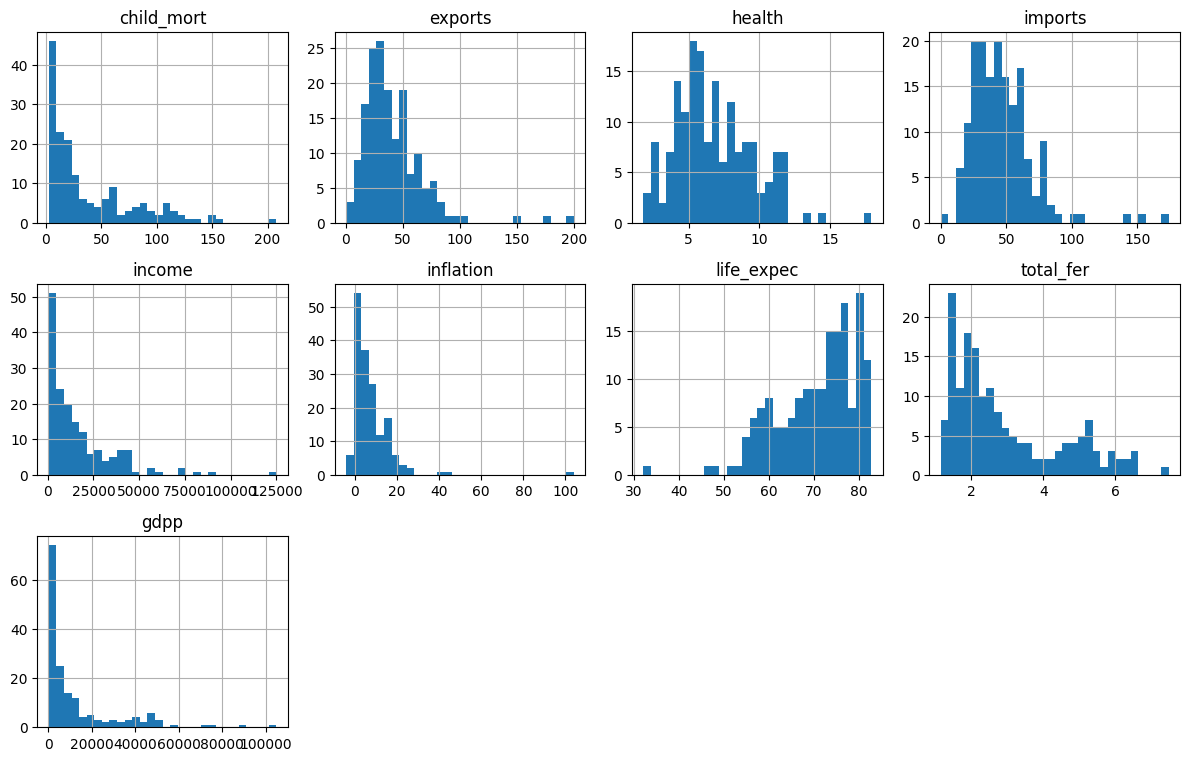

In [94]:
# Data distributions for numeriacal columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].hist(figsize=(12, 10), bins=30, layout=(4, 4))
plt.tight_layout()
plt.show()

Insights: "Histograms offer a visual representation of the frequency distribution of numerical columns, revealing patterns such as skewness, kurtosis, and the presence of outliers.

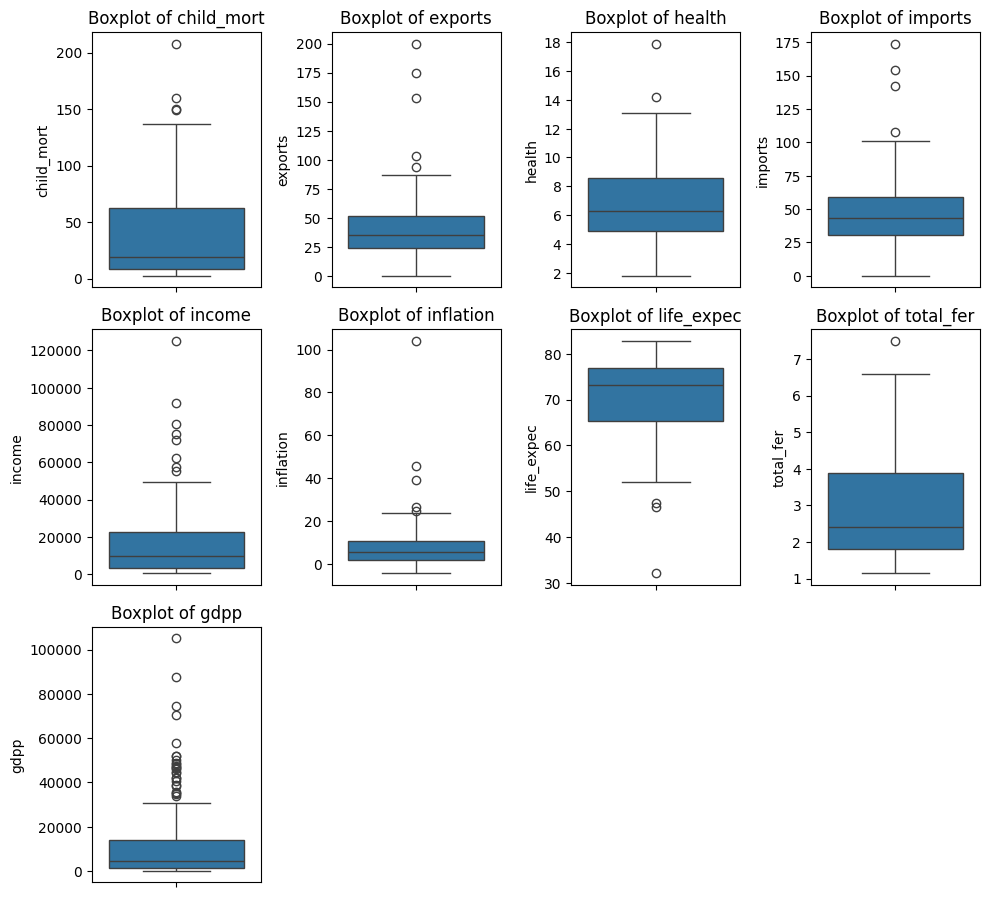

In [95]:
plt.figure(figsize=(10, 12))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Insights: Visual inspection of boxplots reveals the existence of data points that deviate significantly from the majority of the data, indicating the presence of outliers.

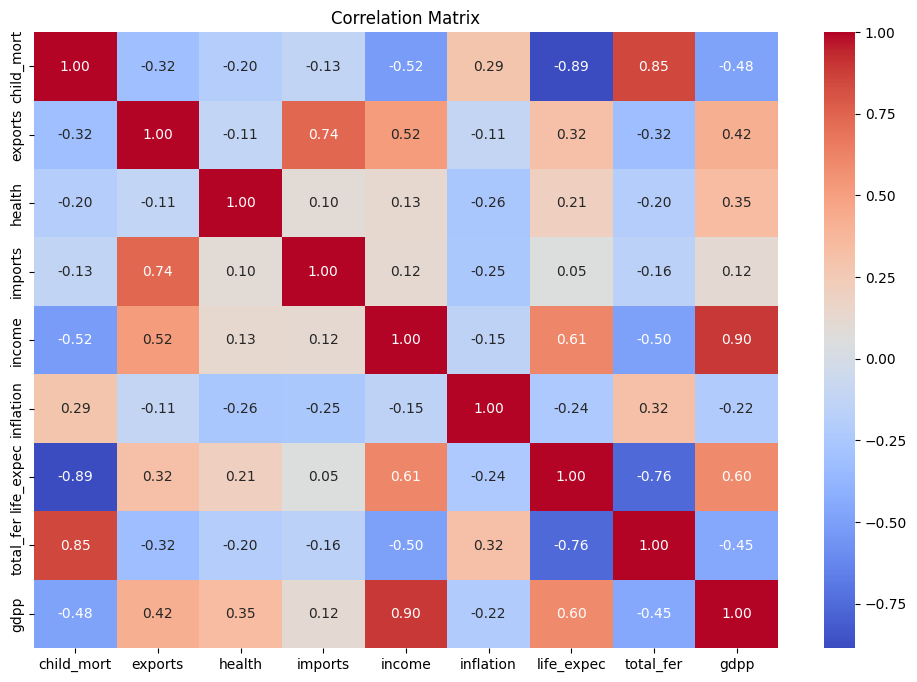

In [96]:
# Plotting Correlation matrix to understand how numerical features affecting each other
corr_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Insights:

1. Child Mortality (child_mort) and Life Expectancy (life_expec):

There is a strong negative correlation (-0.89) between child mortality and life expectancy. This suggests that higher child mortality rates are associated with lower life expectancies.

2. Child Mortality (child_mort) and Total Fertility Rate (total_fer):

A strong positive correlation (0.85) exists between child mortality and total fertility rate. Higher child mortality rates are associated with higher fertility rates, which may indicate that in areas with high child mortality, families tend to have more children.

3. Income and GDP per capita (gdpp):

Income and GDP per capita have a strong positive correlation (0.90), indicating that as income per person increases, GDP per capita also tends to increase. This is expected, as income is a component of GDP per capita.

4. Exports and Imports:

Exports and imports have a strong positive correlation (0.74), suggesting that countries with high exports also tend to have high imports. This might be due to global trade dependencies or trade policies.

5. Life Expectancy (life_expec) and Total Fertility Rate (total_fer):

There is a strong negative correlation (-0.76) between life expectancy and total fertility rate. Higher life expectancy is associated with lower fertility rates, which may reflect a demographic transition where healthier populations have fewer children.

6. Income and Life Expectancy (life_expec):

Income has a moderately strong positive correlation (0.61) with life expectancy. Higher income levels per person are generally associated with longer life expectancies, possibly due to better access to healthcare and improved living conditions.

7. GDP per capita (gdpp) and Life Expectancy (life_expec):

GDP per capita and life expectancy have a positive correlation (0.60). Countries with higher GDP per capita often have higher life expectancies, likely due to better resources and healthcare.

8. Inflation and Life Expectancy (life_expec):

Inflation has a weak negative correlation (-0.24) with life expectancy, suggesting that countries with higher inflation rates might experience slightly lower life expectancies. This could be due to economic instability impacting health services.

9. Total Fertility Rate (total_fer) and GDP per capita (gdpp):

There is a moderately negative correlation (-0.45) between total fertility rate and GDP per capita. Countries with higher GDP per capita tend to have lower fertility rates, which aligns with trends in more developed economies.

10. Exports and GDP per capita (gdpp):

Exports have a positive correlation (0.42) with GDP per capita, indicating that countries with higher exports relative to GDP tend to have a higher GDP per capita. This highlights the economic benefit of exports to overall economic performance.

<Figure size 1000x1200 with 0 Axes>

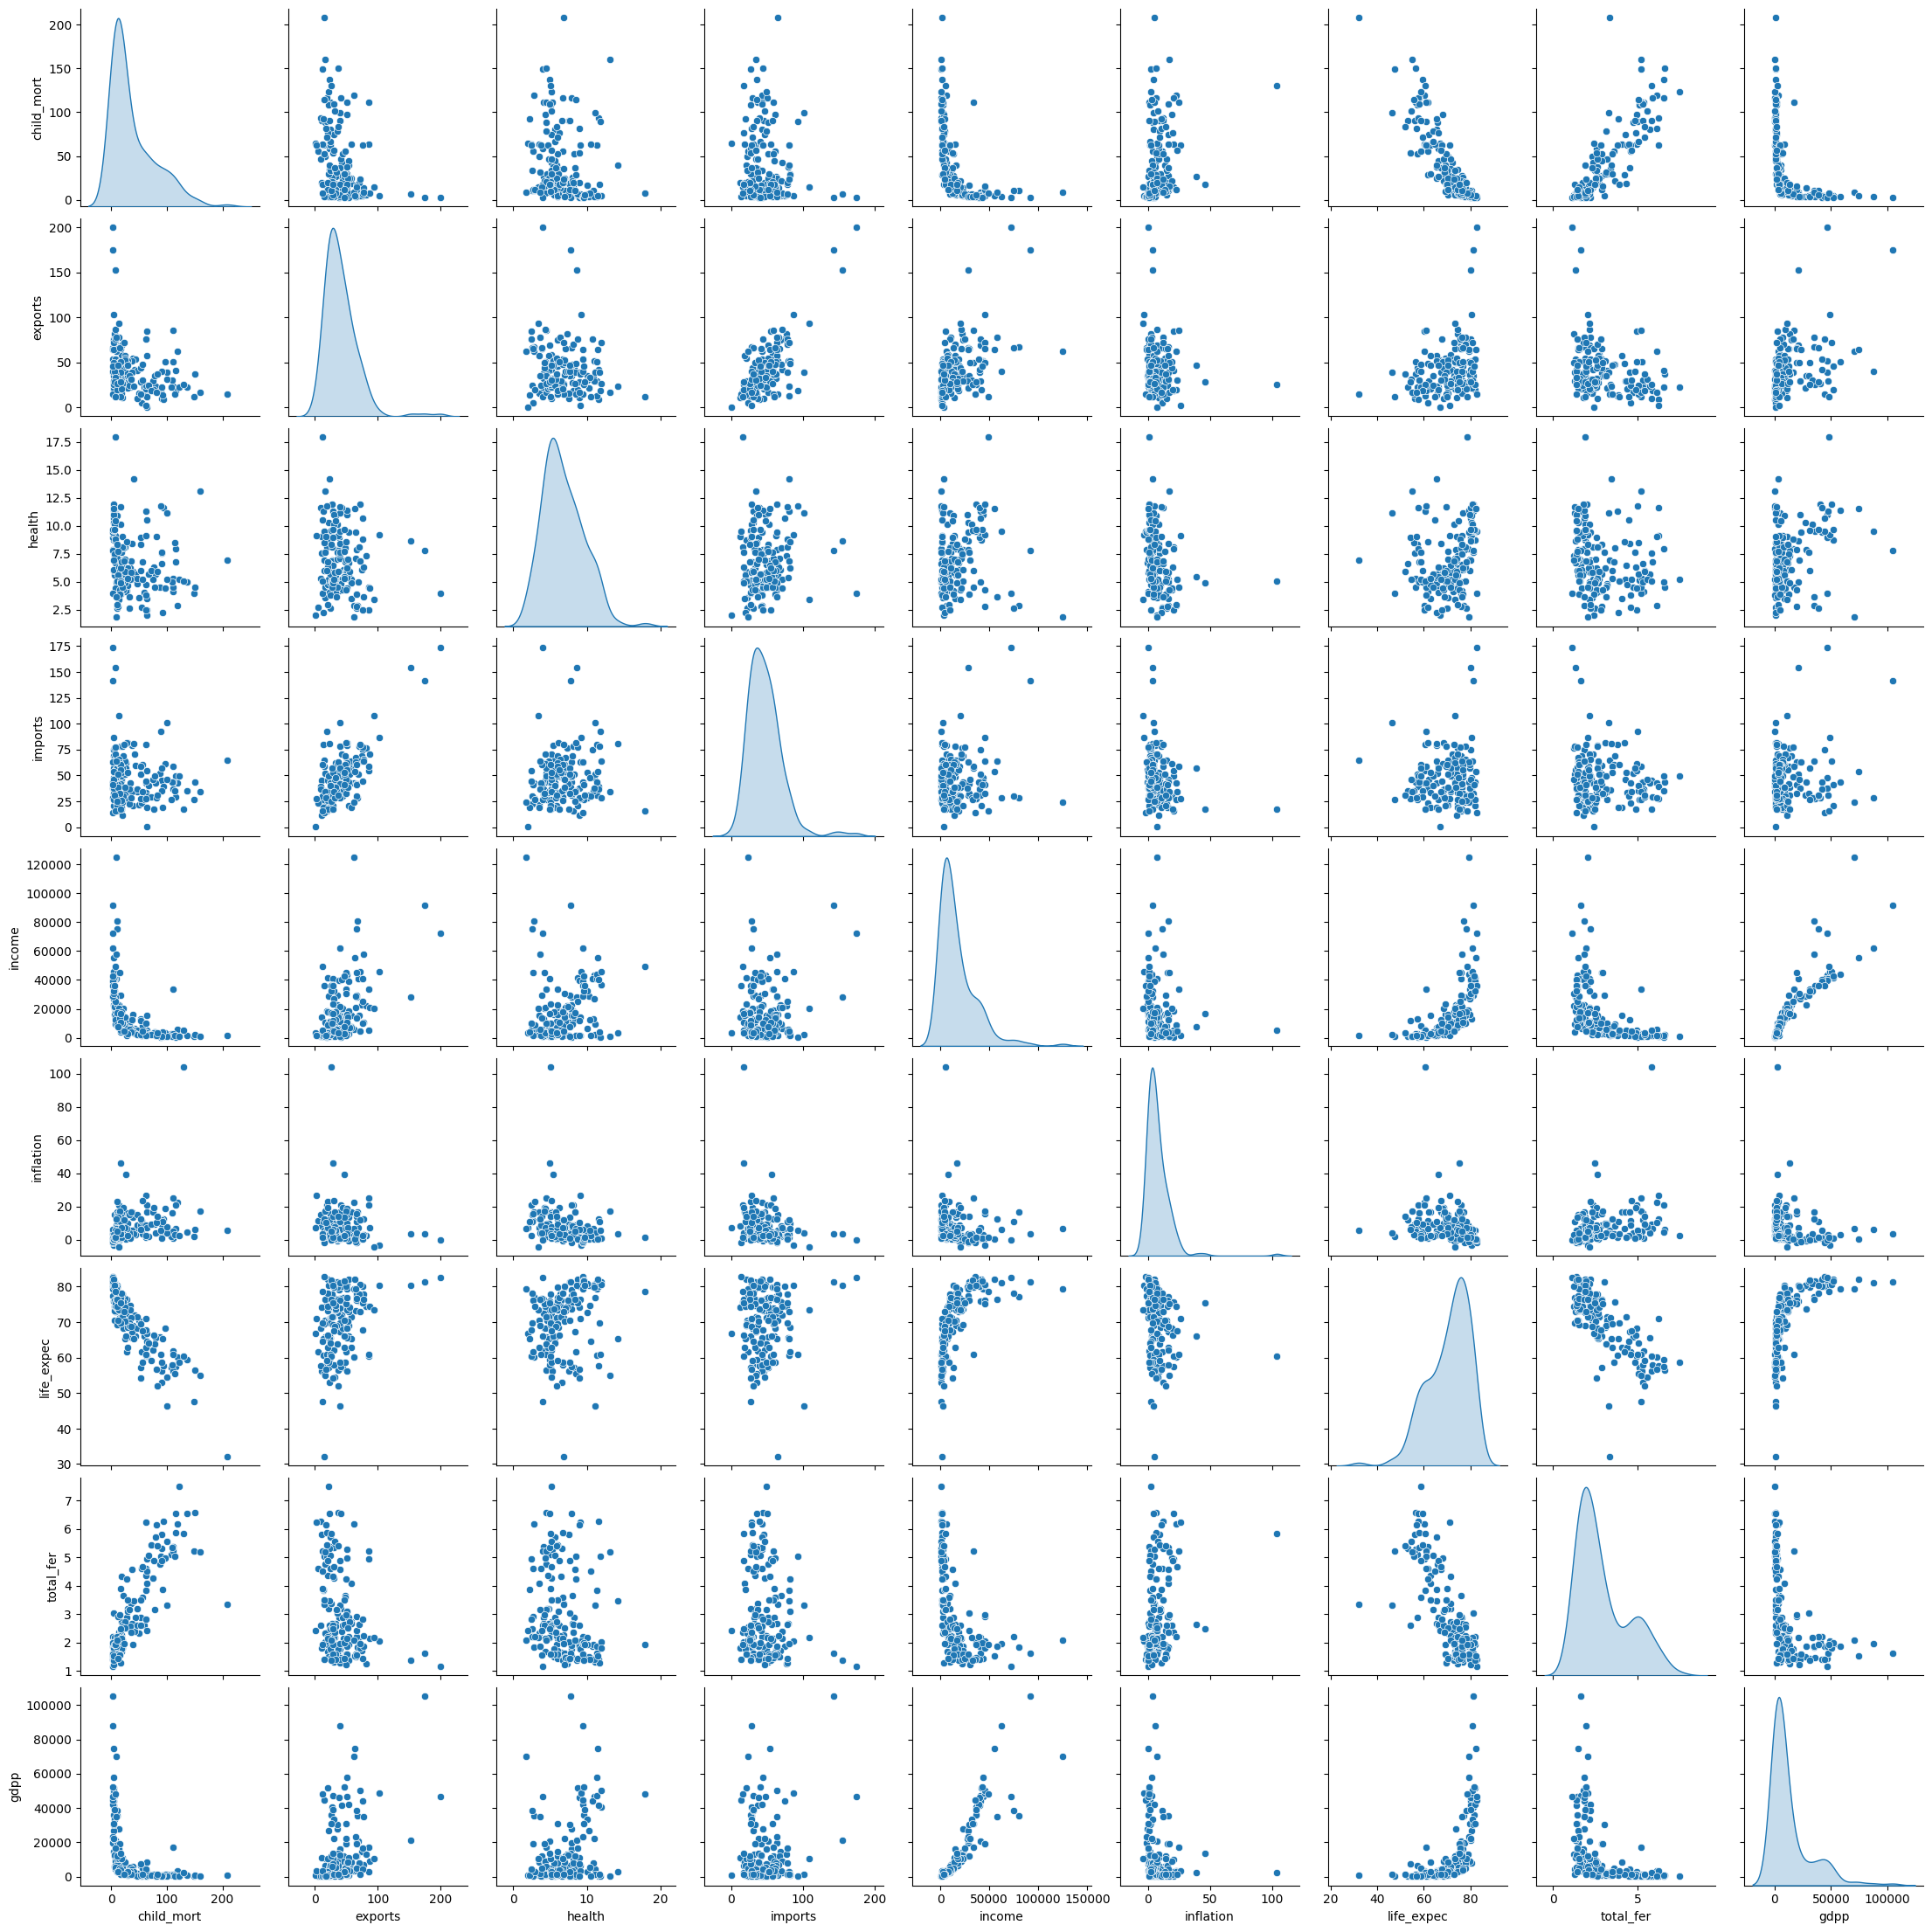

In [97]:
# ploting graph with figure size
plt.figure(figsize = (10,12))
sns.pairplot(df[num_cols], diag_kind='kde')
plt.show()

Insights: Analysis of numerical features reveals that certain variables do not exhibit a linear correlation, suggesting the presence of complex, non-linear relationships

# Feature Engineering

In [98]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Feature Engineering:
as per the description of feature calculating actual amount instead of percentage of Gdpp

In [99]:
df["exports_per_capita"] = df["exports"]/100*df["gdpp"]
df["imports_per_capita"] = df["imports"]/100*df["gdpp"]
df["health_spending"] = df["health"]/100*df["gdpp"]
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exports_per_capita,imports_per_capita,health_spending
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,55.30,248.297,41.9174
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1145.20,1987.740,267.8950
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1712.64,1400.440,185.9820
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2199.19,1514.370,100.6050
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5551.00,7185.800,735.6600


# Outlier Handling

In [100]:
import warnings
warnings.simplefilter(action='ignore')

from scipy.stats.mstats import winsorize

for col in df.select_dtypes(include='number').columns:
     df[col] = winsorize(df[col], limits=[0.05, 0.05])

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exports_per_capita,imports_per_capita,health_spending
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,36.805389,39.370659,6.767904,45.349701,15815.149701,7.016431,70.820359,2.922874,12008.197605,5832.711539,5184.602689,957.087462
std,36.196830,20.034751,2.534195,18.336647,14904.603391,6.276378,8.057568,1.439262,15166.524510,8725.669106,6816.497944,1460.788730
min,3.400000,12.000000,2.770000,17.800000,1210.000000,0.160000,55.600000,1.390000,459.000000,67.560000,168.900000,26.681600
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,447.140000,640.215000,78.535500
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,1777.440000,2045.580000,321.886000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,7278.000000,7719.600000,976.940000
max,116.000000,81.800000,11.600000,81.200000,49400.000000,20.900000,81.400000,5.870000,48700.000000,32283.000000,25023.000000,5017.230000


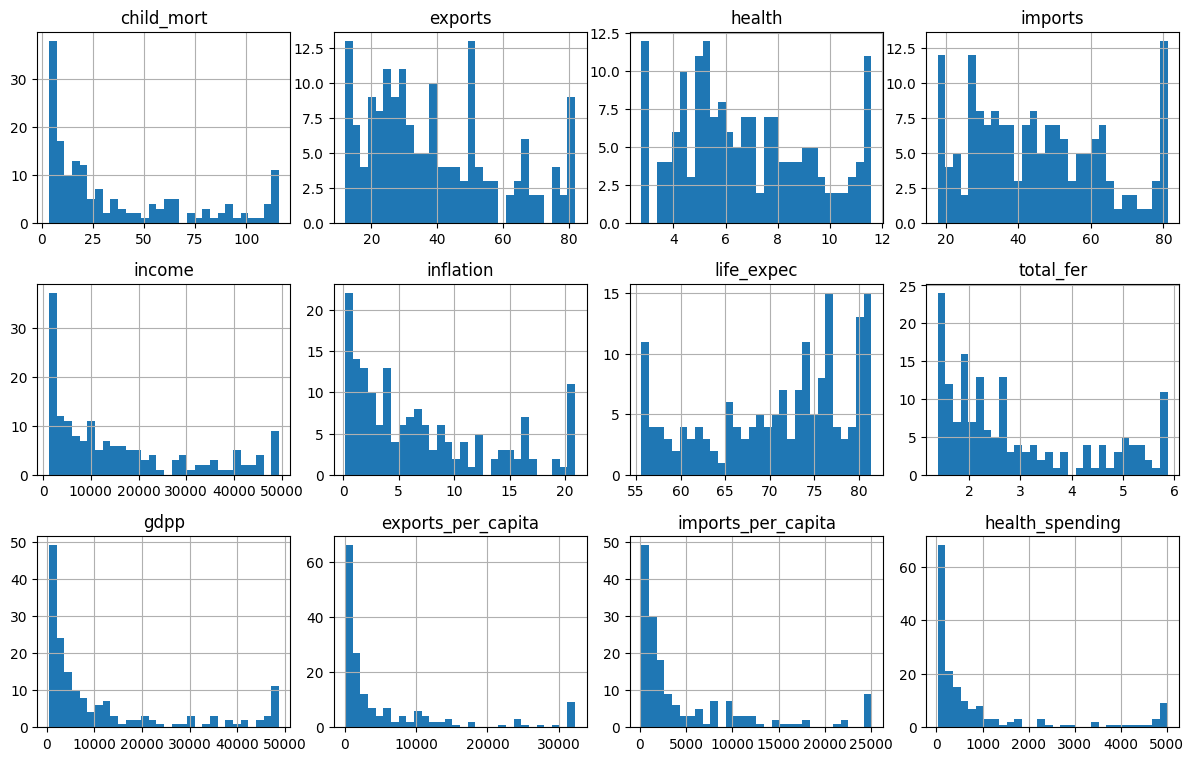

In [101]:
# Data distributions for numeriacal columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].hist(figsize=(12, 10), bins=30, layout=(4, 4))
plt.tight_layout()
plt.show()

# Bivariate Analysis

# Analysis for life expectancy

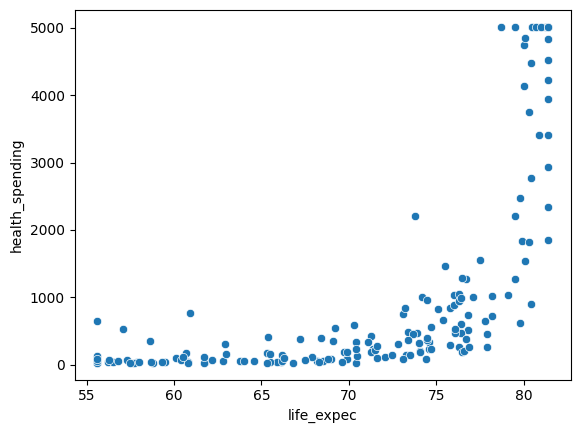

In [102]:
sns.scatterplot(x = "life_expec", y = "health_spending", data = df)
plt.show()

In [103]:
min_life = df[(df['health_spending'] > 800) & (df['life_expec'] < 90)]["life_expec"].min()
avg_life = df[(df['health_spending'] > 800) & (df['life_expec'] < 90)]["life_expec"].mean()
number_of_countries = df[(df['health_spending'] > 800) & (df['life_expec'] < 90)]["country"].count()
median_health_spending = df[(df['health_spending'] > 800) & (df['life_expec'] < 90)]["health_spending"].median()

print(f"Countries spending more than 800 dollers per persone has average life expectancy of {round(avg_life, 2)} years with minimum life expectancy {min_life} years \nthis group consist of {number_of_countries} countries in total median health spending by this {number_of_countries} countries is {median_health_spending} dollers per person")


Countries spending more than 800 dollers per persone has average life expectancy of 78.91 years with minimum life expectancy 73.2 years 
this group consist of 49 countries in total median health spending by this 49 countries is 2209.2 dollers per person


Insights: A positive correlation exists between per capita health spending and life expectancy, indicating that countries investing more in healthcare tend to have longer life expectancies. Among the 49 countries spending over $800 per person on health, the average life expectancy is 79.03 years, with a minimum of 73.2 years.

The median health spending in this group is $2,209.2 per person. This trend highlights the potential impact of increased healthcare investment on extending life expectancy, suggesting that higher health expenditure can contribute to better overall health outcomes for the population.

# Analysis for Child mortalilty

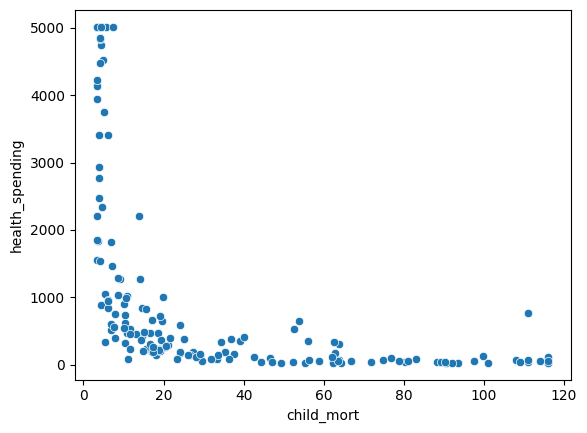

In [104]:
sns.scatterplot(x = "child_mort", y = "health_spending", data = df)
plt.show()

In [105]:
# Higher health spending vs child mortality
max_child_mort = df[(df['health_spending'] > 4000) & (df['child_mort'] > 0)]["child_mort"].max()
avg_child_mort = df[(df['health_spending'] > 4000) & (df['child_mort'] > 0)]["child_mort"].mean()
median_child_mort = df[(df['health_spending'] > 4000) & (df['child_mort'] > 0)]["child_mort"].median()
count_of_countries = df[(df['health_spending'] > 4000) & (df['child_mort'] > 0)]["country"].count()

print(f"Among countries investing more than $4000 per capita in healthcare, the maximum child mortality rate observed is {max_child_mort}. \nThe average and median child mortality rates for this group are {round(avg_child_mort,2)} and {round(median_child_mort,2)}, respectively.This analysis includes data from {count_of_countries} countries.")

Among countries investing more than $4000 per capita in healthcare, the maximum child mortality rate observed is 7.3. 
The average and median child mortality rates for this group are 4.32 and 4.2, respectively.This analysis includes data from 16 countries.


In [106]:
max_child_mort = df[(df['health_spending'] > 800) & (df['child_mort'] < 20)]["child_mort"].max()
avg_child_mort = df[(df['health_spending'] > 800) & (df['child_mort'] < 20)]["child_mort"].mean()
median_child_mort = df[(df['health_spending'] > 800) & (df['child_mort'] < 20)]["child_mort"].median()
count_of_countries = df[(df['health_spending'] > 800) & (df['child_mort'] < 20)]["country"].count()

print(f"Among countries investing more than $800 per capita in healthcare, the maximum child mortality rate observed is {max_child_mort}. \nThe average and median child mortality rates for this group are {round(avg_child_mort,2)} and {round(median_child_mort,2)}, respectively. This analysis includes data from {count_of_countries} countries.")

Among countries investing more than $800 per capita in healthcare, the maximum child mortality rate observed is 19.8. 
The average and median child mortality rates for this group are 6.51 and 4.6, respectively. This analysis includes data from 49 countries.


Insight: Among countries that allocate over $800 per capita on healthcare, child mortality rates are significantly lower. The maximum observed child mortality rate within this group is 19.8 per 1,000 live births, while the average and median rates are 6.51 and 4.6, respectively. This indicates a strong association between higher healthcare spending and reduced child mortality, highlighting the importance of adequate health investment in improving child survival rates. The data from these 49 countries suggest that increased health spending can contribute to better health outcomes for children.

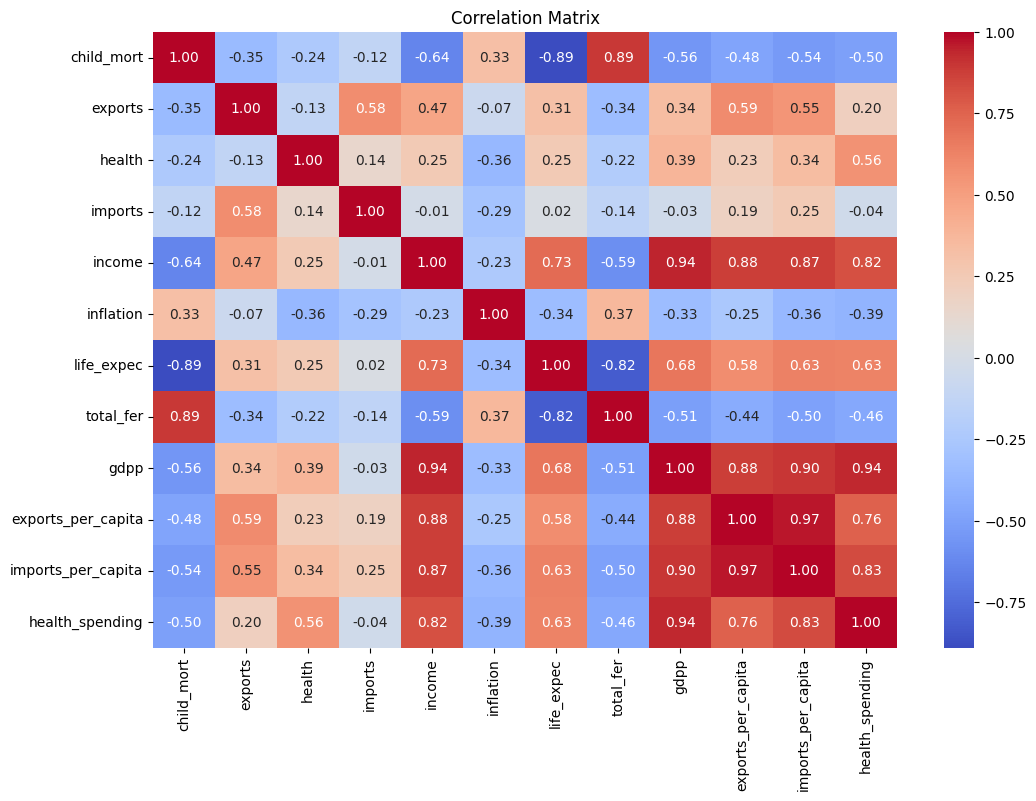

In [107]:
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include = np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Insights:
Most Important Highlights
Negative Relationship Between Child Mortality and Life Expectancy:

The strong negative correlation (-0.89) between child mortality and life expectancy implies that reducing child mortality significantly contributes to longer life expectancy.
Income’s Role in Health and Socio-economic Indicators:

Income shows strong positive correlations with life expectancy (0.73) and health spending (0.82), and a negative correlation with child mortality (-0.64). This highlights income as a powerful factor in both improving health outcomes and lowering child mortality.
GDP Per Capita as an Economic and Health Indicator:

GDP per capita’s high correlation with income (0.94), health spending (0.94), and life expectancy (0.68) indicates that GDP per capita is a central metric linking a country's economic status to its citizens’ health.
Positive Correlation Between Health Spending and Life Expectancy:

The correlation (0.63) between health spending and life expectancy shows that countries investing more in healthcare generally achieve higher life expectancies.
Trade (Exports and Imports) and Economic Prosperity:

Exports and imports have strong positive correlations with GDP per capita (0.59 and 0.87, respectively), reflecting that more affluent countries engage heavily in global trade, supporting overall economic growth.
Fertility Rate’s Connection to Child Mortality and Income:

The fertility rate has a strong positive correlation with child mortality (0.89) and a negative correlation with income (-0.59), showing that higher-income countries tend to have lower fertility rates and child mortality rates.
Inflation’s Moderate Correlation with Child Mortality:

The moderate positive correlation (0.33) between inflation and child mortality suggests that economic instability can impact child health outcomes, though the effect is not as strong as other factors.
Interdependence Between Trade Metrics and Economic Indicators:

Exports and imports are correlated with income and GDP per capita, illustrating that countries with higher income levels tend to have a robust trade presence.

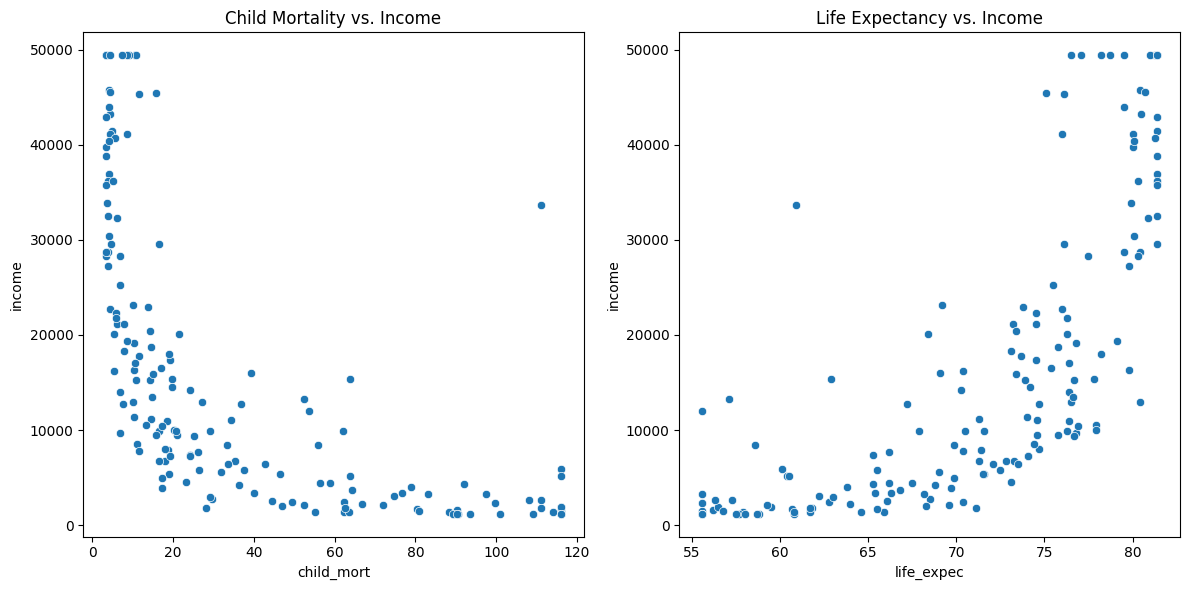

In [108]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(x="child_mort", y="income", data=df, ax=axs[0])
axs[0].set_title("Child Mortality vs. Income")

sns.scatterplot(x="life_expec", y="income", data=df, ax=axs[1])
axs[1].set_title("Life Expectancy vs. Income")

plt.tight_layout()
plt.show()

Insights:

Negative Correlation between Child Mortality and Income

The scatterplot on the left shows a clear negative correlation between child mortality rates and income. As income increases, child mortality rates tend to decrease. This suggests that countries with higher incomes generally have better healthcare infrastructure, education, and living conditions, leading to lower child mortality rates.

Positive Correlation between Life Expectancy and Income

The scatterplot on the right shows a positive correlation between life expectancy and income. As income increases, life expectancy also tends to increase. This indicates that countries with higher incomes have access to better healthcare, nutrition, and overall quality of life, which contribute to longer life expectancies.

Outliers in Child Mortality

There are a few outlier countries in the child mortality vs. income plot. These are countries with relatively high incomes but also high child mortality rates. It would be interesting to investigate these outliers to understand the specific factors contributing to their higher child mortality rates, despite their higher incomes.

# Hypothesis Testing

1. Health Spending and Life Expectancy:

○ Hypothesis: Increased health spending (% of GDP) leads to higher life
expectancy (Life_expec).


In [109]:
df['health'].describe()

count    167.000000
mean       6.767904
std        2.534195
min        2.770000
25%        4.920000
50%        6.320000
75%        8.600000
max       11.600000
Name: health, dtype: float64

* Null Hypothesis (H₀): Increased health spending (% of GDP) does not have a significant impact on life expectancy.

* Alternative Hypothesis (H₁): Increased health spending (% of GDP) has a significant positive impact on life expectancy.

- Decision Rule: We will use a significance level of α = 0.05. If the p-value associated with the t-test statistic is less than 0.05, we will reject the null hypothesis in favor of the alternative hypothesis.

To analyze the impact of health spending on life expectancy, countries were categorized into two groups based on their per capita health expenditure:

* Lower-Spending Countries: Countries with a per capita health expenditure below the 50th percentile.
* Higher-Spending Countries: Countries with a per capita health expenditure above the 50th percentile.

In [110]:
median_spending = df['health_spending'].median()

# Hypothesis test 1: t-test independant
from scipy.stats import ttest_ind

high_spending_group = df[df['health_spending'] > median_spending]['life_expec']
low_spending_group = df[df['health_spending'] <= median_spending]['life_expec']

t_stat, p_value = ttest_ind(high_spending_group, low_spending_group, equal_var=False)

if p_value < 0.05:
    print(f"t_statistic: {round(t_stat, 2)}")
    print("Reject the null hypothesis: Increased health spending (% of GDP) has a significant positive impact on life expectancy.")
else:
    print(f"t_statistic: {round(t_stat)}")
    print("Fail to reject the null hypothesis: Increased health spending (% of GDP) does not have a significant impact on life expectancy.")


# Hypothesis test 2: Mann-Whitney U Test
from scipy.stats import mannwhitneyu

u_statistic, p_value = mannwhitneyu(high_spending_group, low_spending_group)

if p_value < 0.05:
    print(f"u_statistic: {round(u_statistic, 2)}")
    print("Reject the null hypothesis: Increased health spending (% of GDP) has a significant positive impact on life expectancy.")
else:
    print(f"u_statistic: {round(u_statistic)}")
    print("Fail to reject the null hypothesis: Increased health spending (% of GDP) does not have a significant impact on life expectancy.")

t_statistic: 10.89
Reject the null hypothesis: Increased health spending (% of GDP) has a significant positive impact on life expectancy.
u_statistic: 6207.5
Reject the null hypothesis: Increased health spending (% of GDP) has a significant positive impact on life expectancy.


Insight: Both parametric (t-test) and non-parametric (Mann-Whitney U) tests indicate a significant positive correlation between health spending and life expectancy.

2. Fertility and Development:

Hypothesis: Countries with higher Total_fertility rates have lower Income per
person. (Correlation analysis and t-test)

Null Hypothesis (H₀): There is no correlation between the two variables (ρ = 0).

Alternative Hypothesis (H₁): There is a correlation between the two variables (ρ ≠ 0).

Decision Rule: We will use a significance level of α = 0.05. If the p-value associated with the Spearman's Correlation Coefficient is less than 0.05, we will reject the null hypothesis in favor of the alternative hypothesis.

In [111]:
df[['total_fer', "income"]].corr()

,total_fer,income
total_fer,1.000000,-0.588344
income,-0.588344,1.000000


In [112]:
import scipy.stats as stats

corr_coef, p_value = stats.spearmanr(df['total_fer'], df["income"])

print("Spearman's Correlation Coefficient:", corr_coef)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between the two variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between the two variables.")

Spearman's Correlation Coefficient: -0.7404502555737682
P-value: 2.810024834856569e-30
Reject the null hypothesis: There is a significant correlation between the two variables.


Insights:

Statistical analysis revealed a significant negative correlation between total fertility rate and income per person (Spearman's ρ = -0.74, p < 0.05). This implies that as fertility rates increase, income per person tends to decrease, and vice versa.

 3. Income and Child Mortality:

○ Hypothesis: Higher income levels are associated with lower child mortality rates.


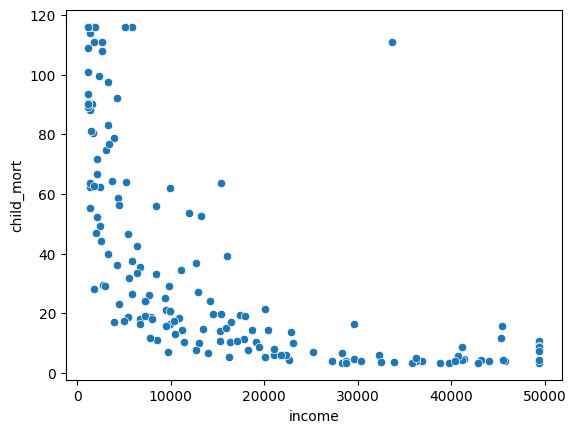

In [113]:
sns.scatterplot(x = "income", y = "child_mort", data = df)
plt.show()

Correlation analysis for Income and child mortality

Pearson and Spearman Correlation Analysis:

- Null Hypothesis (H₀): There is no correlation between income and child mortality.
- Alternative Hypothesis (H₁): There is a correlation between income and child mortality.

In [114]:
# Pearson Correlation Analysis between income and child_mort
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(df['income'], df["child_mort"])

print("Pearson's Correlation Coefficient:", corr_coef)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between the two variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between the two variables.")

print()
# Spearman Correlation Analysis between income and child_mort
corr_coef, p_value = stats.spearmanr(df['income'], df["child_mort"])

print("Spearman's Correlation Coefficient:", corr_coef)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between the two variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between the two variables.")

Pearson's Correlation Coefficient: -0.6353145168605606
P-value: 2.925297942217697e-20
Reject the null hypothesis: There is a significant correlation between the two variables.

Spearman's Correlation Coefficient: -0.8664944011495744
P-value: 1.1676817119571333e-51
Reject the null hypothesis: There is a significant correlation between the two variables.


ttest and Mann-Whitney U Test for analysis of income and child mortality

- Null Hypothesis (H₀): There is no significant difference in child mortality between high-income and low-income countries.
- Alternative Hypothesis (H₁): There is a significant difference in child mortality between high-income and low-income countries.

In [115]:
# To mitigate the impact of outliers, the median was used to split the data into high-income
# and low-income groups, while the mean was calculated for each group to assess average child mortality rates.

median_income = df['income'].median()

high_income_group = df[df['income'] > median_income]['child_mort']
low_income_group = df[df['income'] <= median_income]['child_mort']

t_stat, p_value = ttest_ind(high_income_group, low_income_group, equal_var=False)

if p_value < 0.05:
    print(f"t_statistic: {round(t_stat, 2)}")
    print("Reject the null hypothesis: Income has a significant positive impact on Child mortality.")
else:
    print(f"t_statistic: {round(t_stat, 2)}")
    print("Fail to reject the null hypothesis: Income does not have a significant impact on Child mortality.")


# Hypothesis test 2: Mann-Whitney U Test
from scipy.stats import mannwhitneyu

u_statistic, p_value = mannwhitneyu(high_income_group, low_income_group)

if p_value < 0.05:
    print(f"u_statistic: {round(u_statistic, 2)}")
    print("Reject the null hypothesis: Income has a significant positive impact on Child mortality.")
else:
    print(f"u_statistic: {round(u_statistic, 2)}")
    print("Fail to reject the null hypothesis: Income does not have a significant impact on Child mortality.")

t_statistic: -11.05
Reject the null hypothesis: Income has a significant positive impact on Child mortality.
u_statistic: 477.0
Reject the null hypothesis: Income has a significant positive impact on Child mortality.


Insights:
- Both correlation coefficients indicate a strong negative correlation between income and child mortality. This means that as income increases, child mortality rates tend to decrease.

- T-test and Mann-Whitney U Test: Both tests suggest a significant difference in child mortality rates between high-income and low-income countries. The negative t-statistic and U-statistic indicate that countries with lower income tend to have higher child mortality rates.

The results consistently demonstrate a strong negative relationship between income and child mortality. Countries with higher per capita income tend to have lower child mortality rates, suggesting that economic development and investments in healthcare and social programs are crucial factors in reducing child mortality.

4. Inflation and Economic Stability:

○ Hypothesis: Higher inflation rates are associated with lower GDP per capita,
indicating economic instability.

○ Test: Perform a correlation analysis to examine the relationship between inflation
and GDP per capita. Additionally, conduct a t-test to compare the mean GDP per
capita between countries with high inflation and low inflation.


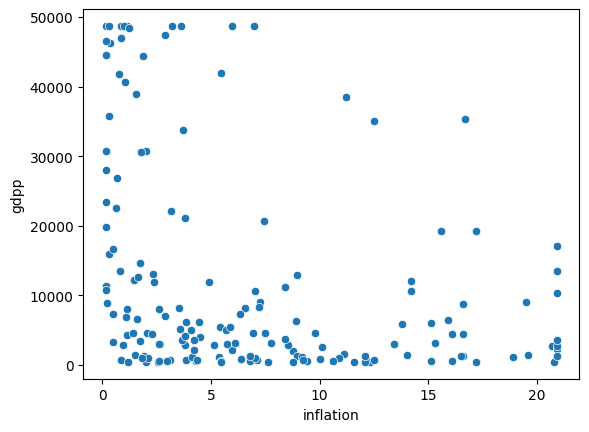

In [116]:
sns.scatterplot(x = "inflation", y = "gdpp", data = df)
plt.show()

Correlation analysis for Inflation and GDP per capita

Pearson and Spearman Correlation Analysis:

- Null Hypothesis (H₀): There is no correlation between Inflation and GDP per capita.
- Alternative Hypothesis (H₁): There is a correlation  between Inflation and GDP per capita.

In [117]:
# Pearson Correlation Analysis between Inflation and GDP per capita
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(df['inflation'], df["gdpp"])

print("Pearson's Correlation Coefficient:", corr_coef)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between the two variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between the two variables.")

print()
# Spearman Correlation Analysis between income and child_mort
corr_coef, p_value = stats.spearmanr(df['inflation'], df["gdpp"])

print("Spearman's Correlation Coefficient:", corr_coef)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between the two variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between the two variables.")

Pearson's Correlation Coefficient: -0.33293875847535354
P-value: 1.1011891306983958e-05
Reject the null hypothesis: There is a significant correlation between the two variables.

Spearman's Correlation Coefficient: -0.3969613163561354
P-value: 1.089016845409548e-07
Reject the null hypothesis: There is a significant correlation between the two variables.


ttest and Mann-Whitney U Test for analysis of Inflation and GDP per capita

Null Hypothesis (H₀): There is no significant difference in GDP per between high-inflation and low-inflation of countries.

Alternative Hypothesis (H₁): There is a significant difference in GDP per between high-inflation and low-inflation of countries.

In [118]:
# To mitigate the impact of outliers, the median was used to split the data into high-inflation
# and low-inflation groups, while the mean was calculated for each group to assess average GDPP
median_inflation = df['inflation'].median()

high_inflation_group = df[df['inflation'] > median_inflation]['gdpp']
low_inflation_group = df[df['inflation'] <= median_inflation]['gdpp']

t_stat, p_value = ttest_ind(high_inflation_group, low_inflation_group, equal_var=False)

if p_value < 0.05:
    print(f"t_statistic: {round(t_stat, 2)}")
    print("Reject the null hypothesis: Inflation has a significant negative impact on GDPP.")
else:
    print(f"t_statistic: {round(t_stat, 2)}")
    print("Fail to reject the null hypothesis: Inflation does not have a significant impact on GDPP.")


# Hypothesis test 2: Mann-Whitney U Test
from scipy.stats import mannwhitneyu

u_statistic, p_value = mannwhitneyu(high_inflation_group, low_inflation_group)

if p_value < 0.05:
    print(f"u_statistic: {round(u_statistic, 2)}")
    print("Reject the null hypothesis: Inflation has a significant negative impact on GDPP.")
else:
    print(f"u_statistic: {round(u_statistic, 2)}")
    print("Fail to reject the null hypothesis: Inflation does not have a significant impact on GDPP.")

t_statistic: -4.32
Reject the null hypothesis: Inflation has a significant negative impact on GDPP.
u_statistic: 2214.0
Reject the null hypothesis: Inflation has a significant negative impact on GDPP.


Insights:

The analysis reveals a significant negative correlation between inflation rates and GDP per capita. Both parametric (Pearson) and non-parametric (Spearman) correlation tests confirm this relationship. Furthermore, t-tests and Mann-Whitney U tests provide additional evidence that countries with higher inflation rates tend to have lower GDP per capita. These findings suggest that high inflation can hinder economic growth and stability.

# Model Building

Feature engineering

In [119]:
# high child mortality indicating need for aid
df["High_Child_Mortality"] = (df["child_mort"] > 20).astype(int)

# low life expectancy indicating need for aid
df["low_Life_Expectancy"] = (df["life_expec"] < df["life_expec"].median()).astype(int)

# ration of export by import indicating Trade Balance  (A higher export/import ratio often signifies a stronger economy)
df["ratio_export_import"] = df["exports"]/df["imports"]

# Inflation-adjusted GDP per capita = Nominal GDP per capita / (1 + Inflation Rate)
df["inflation_adjusted_gdpp"] = df["gdpp"] / (1 + df["inflation"])


In [120]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

Normalization of the dataset

In [121]:
scaled_df = df.copy()

In [122]:
# Normalization of data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[num_cols])
scaled_df[num_cols]= scaler.transform(df[num_cols])

# Clustering Using KNN
- All features are included

In [123]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_means_basic_model = KMeans(n_clusters = 3, init='random')
predict = k_means_basic_model.fit_predict(scaled_df[num_cols])

df["k_means_basic_model"] = predict

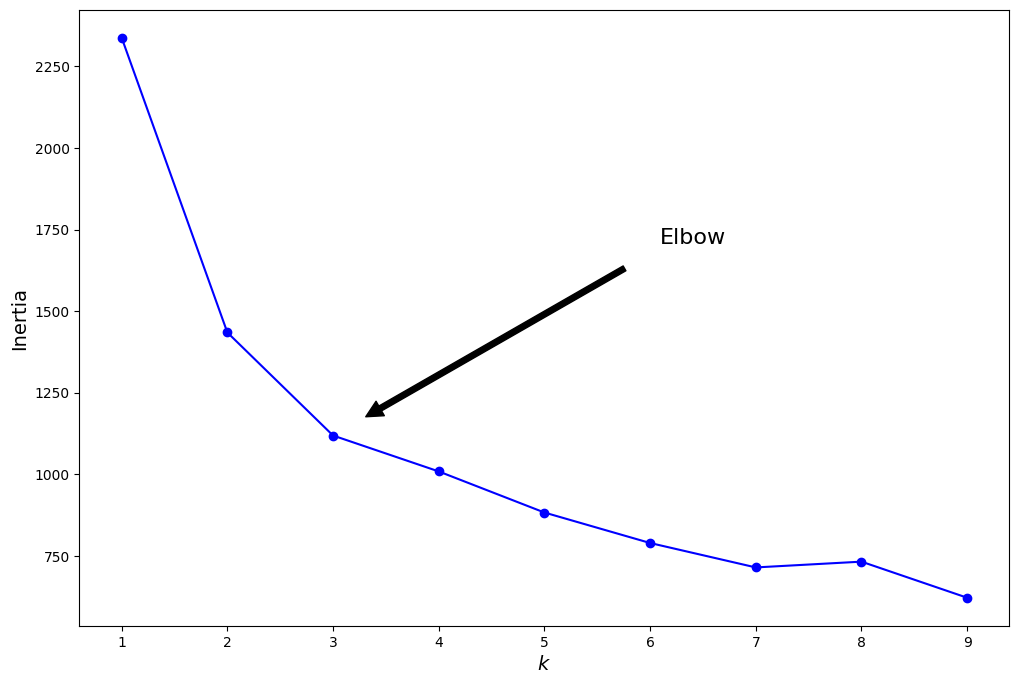

In [124]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(scaled_df[num_cols])
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [125]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
clusters = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_df[num_cols])
    labels = kmeans.labels_
    score = silhouette_score(scaled_df[num_cols], labels)
    silhouette_scores.append(score)
    clusters.append(k)
    print(f"For n_clusters = {k}, the average silhouette score is: {score}")


best_cluster_index = np.argmax(silhouette_scores)
print()
print(f"The optimal number of clusters is {best_cluster_index + 2} with a Silhouette Score of {silhouette_scores[best_cluster_index]:.3f}")



For n_clusters = 2, the average silhouette score is: 0.4097177636299885
For n_clusters = 3, the average silhouette score is: 0.27494250485605154
For n_clusters = 4, the average silhouette score is: 0.25827107733385596
For n_clusters = 5, the average silhouette score is: 0.21074757886460047
For n_clusters = 6, the average silhouette score is: 0.2103981806885124
For n_clusters = 7, the average silhouette score is: 0.240100802165716
For n_clusters = 8, the average silhouette score is: 0.2177562664937975
For n_clusters = 9, the average silhouette score is: 0.21621391400651288
For n_clusters = 10, the average silhouette score is: 0.2004222893476023

The optimal number of clusters is 2 with a Silhouette Score of 0.410


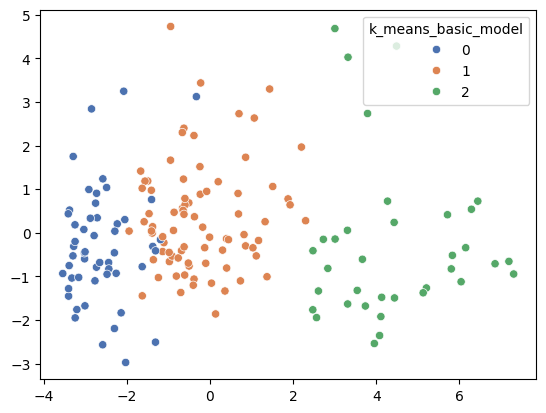

In [126]:
# Principle componant analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df[num_cols])

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df["k_means_basic_model"], palette="deep")
plt.show()

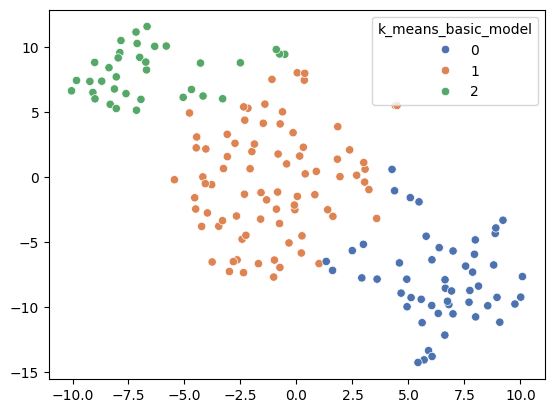

In [127]:
# t-SNE for cluster visulaization

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_df[num_cols])

sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df["k_means_basic_model"], palette="deep")
plt.show()

Insights: K-Means clustering with K=3 appears to have produced reasonably well-separated clusters. The clusters are distinct, and there seems to be minimal overlap between them.

In [128]:
polar = scaled_df[num_cols].groupby(df['k_means_basic_model']).mean().reset_index()
polar = pd.melt(polar, id_vars=["k_means_basic_model"])


import plotly.express as px

"""
  'polar' : dataset we are using
  'r' :  mean values for each feature which will be connected using lines
  'theta' : variables where each of the feature will have an angle and
            color will be based on the label of the clusters.
"""
fig = px.line_polar(polar, r="value", theta="variable", color="k_means_basic_model", line_close=True,height=700,width=800)
fig.show()

Insights:

Our analysis suggests that an optimal cluster solution for this dataset lies between 2 and 3 clusters. This conclusion is supported by the Elbow Method and Silhouette Score, which indicate that a balance between cluster compactness and separation is achieved within this range.

To further validate the significance of these clusters, hypothesis testing can be employed to assess differences between groups. If substantial differences are identified, a 3-cluster solution may be more appropriate. Conversely, if certain clusters exhibit minimal differences, a 2-cluster solution could be considered, or alternative clustering algorithms may be explored.

# Clustering Using Hierarchical Clustering
- Performing Agglomerative Clustering
- All features are selected

Text(0, 0.5, 'distance')

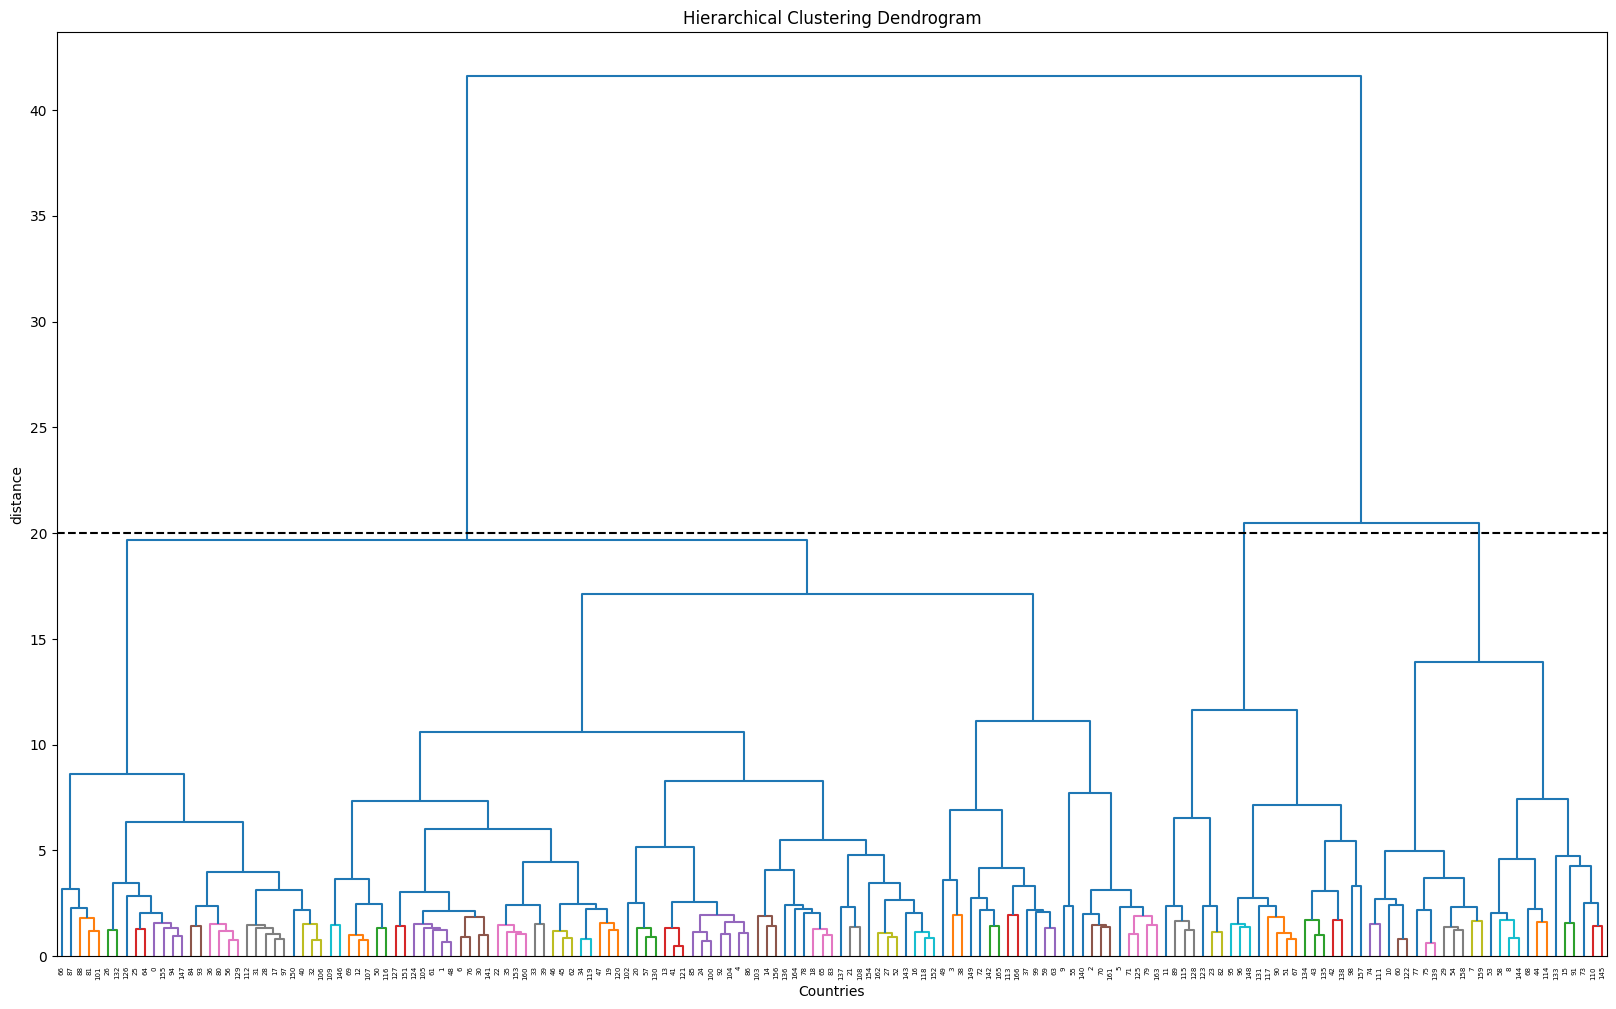

In [129]:
import scipy.cluster.hierarchy as sch

Z = sch.linkage(scaled_df[num_cols], method='ward')

fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
plt.axhline(y=20, color='k', linestyle='--')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
ax.set_ylabel('distance')

Insight:

Based on the dendrogram analysis, three clusters (K=3) appears to be an optimal choice for the dataset. This number of clusters effectively balances the trade-off between cluster compactness and separation, as indicated by the distinct vertical branches in the dendrogram.

In [130]:
from sklearn.cluster import AgglomerativeClustering

# Create clusters
hc_2020 = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Removed metric argument
y_pred = hc_2020.fit_predict(scaled_df[num_cols])

df["AgglomerativeClustering"] = y_pred

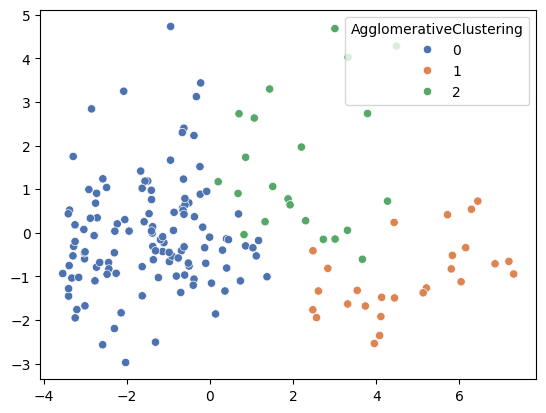

In [131]:
# Principle componant analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df[num_cols])

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df["AgglomerativeClustering"], palette="deep")
plt.show()

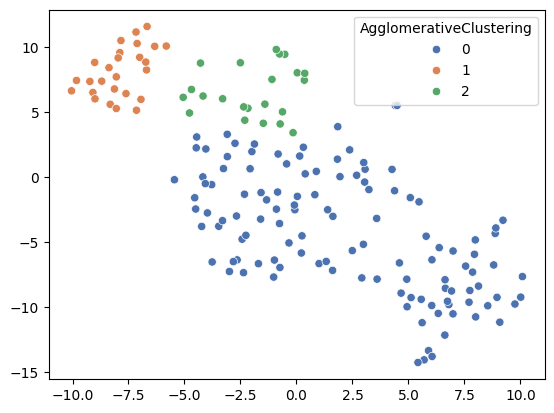

In [132]:
# t-SNE for cluster visulaization

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_df[num_cols])

sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df["AgglomerativeClustering"], palette="deep")
plt.show()

In [133]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
clusters = []
for k in range(2, 11):
    Clusters_k = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(scaled_df[num_cols])
    labels = Clusters_k.labels_
    score = silhouette_score(scaled_df[num_cols], labels)
    silhouette_scores.append(score)
    clusters.append(k)
    print(f"For n_clusters = {k}, the average silhouette score is: {score}")


best_cluster_index = np.argmax(silhouette_scores)
print()
print(f"The optimal number of clusters is {best_cluster_index + 2} with a Silhouette Score of {silhouette_scores[best_cluster_index]:.3f}")



For n_clusters = 2, the average silhouette score is: 0.36280741232159636
For n_clusters = 3, the average silhouette score is: 0.29223666918979513
For n_clusters = 4, the average silhouette score is: 0.2144903127541071
For n_clusters = 5, the average silhouette score is: 0.23558749436767948
For n_clusters = 6, the average silhouette score is: 0.23805933487610387
For n_clusters = 7, the average silhouette score is: 0.2388147905011097
For n_clusters = 8, the average silhouette score is: 0.23562493667236417
For n_clusters = 9, the average silhouette score is: 0.21054562906175292
For n_clusters = 10, the average silhouette score is: 0.2146088551475617

The optimal number of clusters is 2 with a Silhouette Score of 0.363


Insights:
Based on the analysis of Silhouette Scores and the Dendrogram, two clusters (K=2) appears to be the optimal choice for this dataset. While three clusters (K=3) also showed promising results, the slightly higher Silhouette Score for K=2 suggests that it provides a better balance between cluster compactness and separation. This optimal number of clusters will enable more effective segmentation and analysis of the data.

In [134]:
polar = scaled_df[num_cols].groupby(df['AgglomerativeClustering']).mean().reset_index()
polar = pd.melt(polar, id_vars=["AgglomerativeClustering"])


import plotly.express as px

"""
  'polar' : dataset we are using
  'r' :  mean values for each feature which will be connected using lines
  'theta' : variables where each of the feature will have an angle and
            color will be based on the label of the clusters.
"""
fig = px.line_polar(polar, r="value", theta="variable", color="AgglomerativeClustering", line_close=True,height=700,width=800)
fig.show()

# Using DBSCAN for Clustering

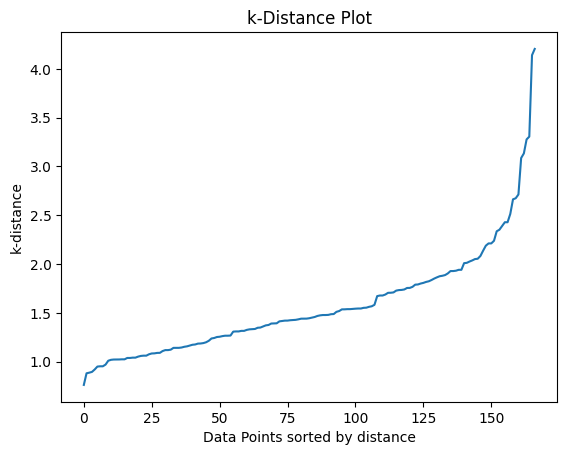

In [135]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Fit Nearest Neighbors
neighbors = NearestNeighbors(n_neighbors=3)  # Use min_samples as the number of neighbors
neighbors_fit = neighbors.fit(scaled_df[num_cols])
distances, indices = neighbors_fit.kneighbors(scaled_df[num_cols])

# Plot k-Distance
distances = np.sort(distances[:, -1])  # Sort the distances for the k-th nearest neighbors
plt.plot(distances)
plt.title("k-Distance Plot")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("k-distance")
plt.show()


Insight: Based on the K-distance plot, an epsilon value between 2 and 2.5 appears to be suitable for DBSCAN clustering. This range balances cluster density and noise tolerance, promising effective cluster formation.

In [136]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples= 3)
dbscan.fit(scaled_df[num_cols])
df["DBSCAN"] = dbscan.labels_
silhouette_scores = []
dbscan_score = silhouette_score(scaled_df[num_cols], dbscan.labels_)
silhouette_scores.append(dbscan_score)
print(f"the average silhouette score is: {dbscan_score}")
df["DBSCAN"].value_counts()

the average silhouette score is: -0.037232890941293596


DBSCAN
 0    143
-1     13
 3      4
 1      4
 2      3
Name: count, dtype: int64

Insight: DBSCAN is not able to identify the cluster and mostly assigning all the points to sigle cluster and others as noice

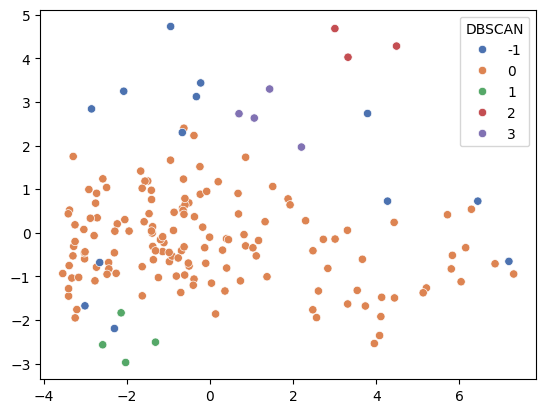

In [137]:
# Principle componant analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df[num_cols])

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df["DBSCAN"], palette="deep")
plt.show()

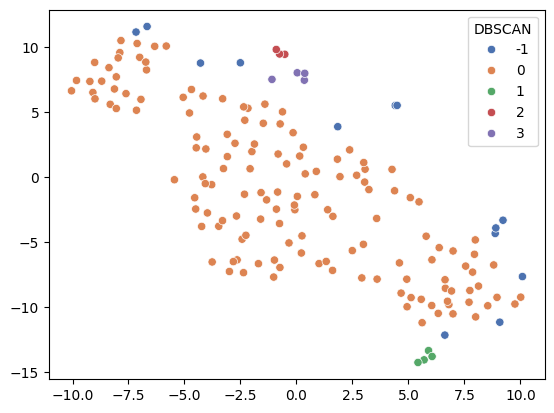

In [138]:
# t-SNE for cluster visulaization

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_df[num_cols])

sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df["DBSCAN"], palette="deep")
plt.show()

In [139]:
polar = scaled_df[num_cols].groupby(df['DBSCAN']).mean().reset_index()
polar = pd.melt(polar, id_vars=["DBSCAN"])


import plotly.express as px

"""
  'polar' : dataset we are using
  'r' :  mean values for each feature which will be connected using lines
  'theta' : variables where each of the feature will have an angle and
            color will be based on the label of the clusters.
"""
fig = px.line_polar(polar, r="value", theta="variable", color="DBSCAN", line_close=True,height=700,width=800)
fig.show()

Clustering analysis was performed using K-Means, Hierarchical Clustering, and DBSCAN algorithms. Based on the results from the Elbow Method, Silhouette Scores, and exploratory data analysis (EDA), the dataset was found to likely contain 2 or 3 clusters. While higher evaluation metrics were observed for 2 clusters in some algorithms, the EDA and problem requirements indicated that a 3-cluster configuration better aligned with the dataset's characteristics. Labels were assigned to the clusters accordingly. DBSCAN is not able to identify clusters in the dataset

- Key Observations:
1. Feature Consideration:

All features from the dataset were used for clustering without applying specific feature selection techniques or addressing potential collinearity.
While assumptions like variable independence (non-correlation) and representativeness of the sample for the population are typically important, they were not strictly enforced in this analysis.
2. Distance Metrics:

Correlated features were not removed, nor were alternative distance measures like Mahalanobis distance employed to account for correlations.
3. Data Preparation:

Standard scaling was applied to normalize the data.
Outliers were addressed using Winsorization prior to clustering, but additional preprocessing steps could improve cluster quality further.
4. Hyperparameter Tuning:

Hyperparameter tuning for clustering algorithms (e.g., eps for DBSCAN or n_clusters for K-Means) was not extensively performed.
This might leave room for improvement in clustering performance and evaluation metrics.
5. Cluster Quality:

Despite acceptable Silhouette Scores, the quality of clustering could potentially be enhanced through:
Feature selection and dimensionality reduction.
Addressing collinearity between features.
Fine-tuning hyperparameters specific to each algorithm.
6.  Next Steps:
To improve the clustering analysis:

- Performing feature selection or dimensionality reduction (e.g., PCA) to address correlated features.
- Conducting hyperparameter tuning for each algorithm to optimize cluster formation.
- Considering alternative distance measures (e.g., Mahalanobis) for datasets with correlated variables.

***The current cluster assignments effectively represent the dataset's features, as demonstrated through polar plots, which visually highlight distinct feature patterns and variations across the clusters. However DBSCAN is not suited for our current dataset***

In [140]:
scaled_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exports_per_capita,imports_per_capita,health_spending,High_Child_Mortality,low_Life_Expectancy,ratio_export_import,inflation_adjusted_gdpp
0,Afghanistan,1.479555,-1.370268,0.321419,-0.024598,-0.955938,0.387303,-1.819945,2.018979,-0.757566,-0.662699,-0.726348,-0.628375,1,1,-1.510888,-0.532833
1,Albania,-0.559888,-0.569254,-0.086244,0.177790,-0.396042,-0.403741,0.682107,-0.887054,-0.523654,-0.538825,-0.470400,-0.473214,0,0,-0.790212,-0.453835
2,Algeria,-0.263393,-0.048594,-1.028223,-0.763043,-0.196175,1.451616,0.707003,-0.022910,-0.499185,-0.473598,-0.556817,-0.529457,1,0,0.718934,-0.509106
3,Angola,2.194468,1.147921,-1.550665,-0.133998,-0.667241,2.218688,-1.334472,2.053823,-0.560689,-0.417670,-0.540053,-0.588078,1,1,1.253914,-0.520479
4,Antigua and Barbuda,-0.734459,0.306856,-0.292055,0.741196,0.221054,-0.891151,0.744347,-0.552546,0.012684,-0.032382,0.294464,-0.152037,0,0,-0.332045,0.031894


Clustering after dimentionality reduction using PCA

In [141]:
# Performing PCA to get all the principle components
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_df[num_cols])
pca = PCA()


pca.fit(scaled_data)

principal_components = pca.components_

print("Principal Components first 3 eigen vectors:\n", principal_components[:3])

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio of each component:\n", explained_variance_ratio)

transformed_data = pca.transform(scaled_data)
print("Transformed Data (Principal Component Scores) first 3 rows:\n", transformed_data[:3])

Principal Components first 3 eigen vectors:
 [[-0.27769798  0.18611139  0.14686159  0.05560637  0.34519732 -0.15912787
   0.30408799 -0.26410543  0.34722573  0.32733062  0.34281598  0.32485275
   0.13982723  0.29422294]
 [-0.01681268  0.3857647  -0.48307842 -0.09114342  0.13203103  0.41685336
   0.0091084  -0.00297326 -0.01143554  0.13852707  0.02534472 -0.1677219
   0.57403037 -0.20083811]
 [-0.12226686  0.46515215 -0.06423261  0.73086753 -0.13405781 -0.2329283
   0.00110962 -0.15075751 -0.19975121  0.01184847  0.04317964 -0.22191241
  -0.17133413 -0.12218452]]
Explained Variance Ratio of each component:
 [0.52053036 0.14168689 0.11381162 0.09811297 0.04338308 0.02829126
 0.01977468 0.01052391 0.00717622 0.0059781  0.00517049 0.00385005
 0.00105897 0.0006514 ]
Transformed Data (Principal Component Scores) first 3 rows:
 [[-3.39945612 -1.45028743 -0.54984174  1.61588736  0.17751409 -0.45944351
  -0.25027678 -0.0047796   0.04487207 -0.45160344 -0.19498859  0.02635104
   0.00518558 -0.04

In [142]:
# selecting the principle components withich explain the 95% of the variance in the data.

variance_ratio = explained_variance_ratio

cumulative_variance_ratio = np.cumsum(variance_ratio)

threshold = 0.95
optimal_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

print(f"Optimal number of components based on 95% variance threshold: {optimal_components}")

Optimal number of components based on 95% variance threshold: 7


In [143]:
# creating a data frame with dimentionality reduction

X = scaled_df.copy()
pca = PCA(n_components=optimal_components)
pca_result = pca.fit_transform(scaled_df[num_cols])
X = pd.DataFrame(pca_result, columns=[f"PC{i}" for i in range(1, optimal_components + 1)])

In [144]:
k_means_pca_model = KMeans(n_clusters = 3)
predict = k_means_pca_model.fit_predict(X)

df["k_means_pca_model"] = predict

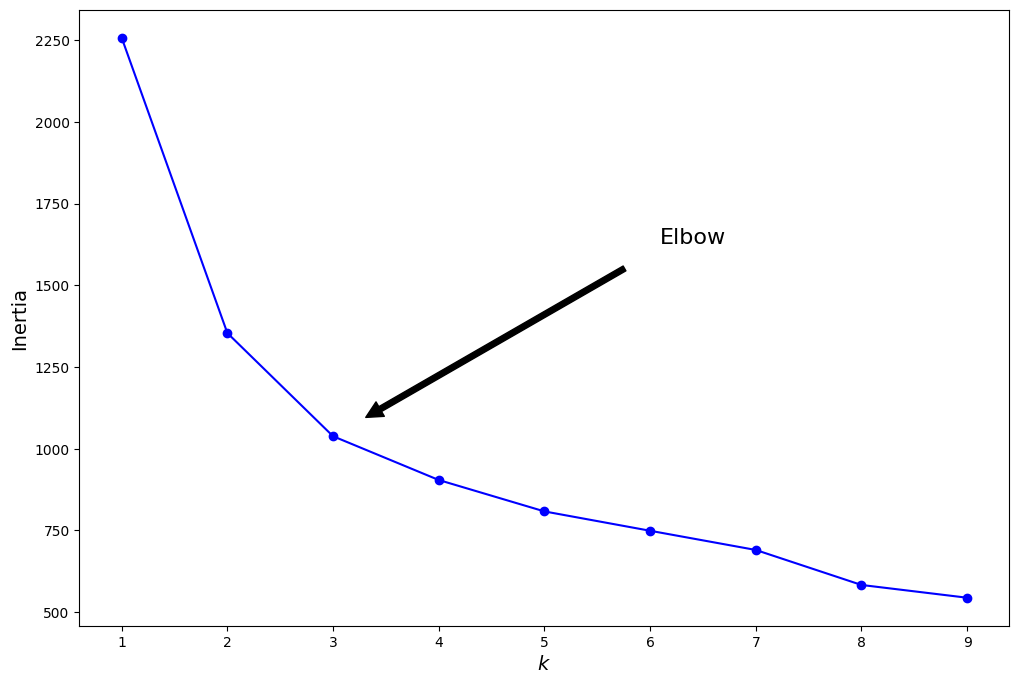

In [145]:
# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [146]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
clusters = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    clusters.append(k)
    print(f"For n_clusters = {k}, the average silhouette score is: {score}")


best_cluster_index = np.argmax(silhouette_scores)
print()
print(f"The optimal number of clusters is {best_cluster_index + 2} with a Silhouette Score of {silhouette_scores[best_cluster_index]:.3f}")



For n_clusters = 2, the average silhouette score is: 0.4215792040535429
For n_clusters = 3, the average silhouette score is: 0.28989704735108585
For n_clusters = 4, the average silhouette score is: 0.2732951087748687
For n_clusters = 5, the average silhouette score is: 0.25154492794916766
For n_clusters = 6, the average silhouette score is: 0.24111500450638865
For n_clusters = 7, the average silhouette score is: 0.2588772298296523
For n_clusters = 8, the average silhouette score is: 0.22945032983055902
For n_clusters = 9, the average silhouette score is: 0.22062312913895923
For n_clusters = 10, the average silhouette score is: 0.22954317317755946

The optimal number of clusters is 2 with a Silhouette Score of 0.422


Insight: While the Silhouette Score suggests that a two-cluster solution may be optimal, considering the presence of outliers and the domain knowledge, a three-cluster solution appears more appropriate. This decision is further supported by exploratory data analysis (EDA) which indicates distinct subgroups within the data.

By opting for three clusters, we can potentially identify a separate cluster for outlier data points or specific subpopulations that deviate significantly from the main clusters. This approach can lead to more nuanced insights and improved model performance.

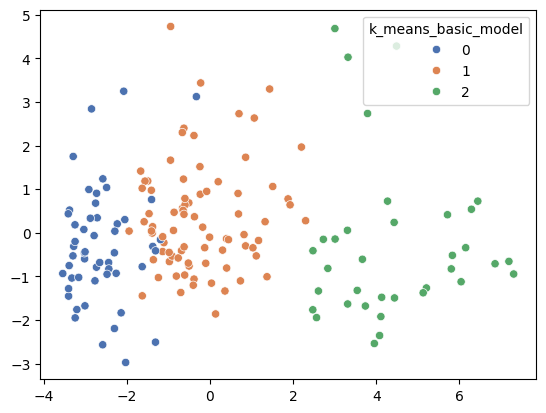

In [147]:
# Principle componant visual analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df["k_means_basic_model"], palette="deep")
plt.show()

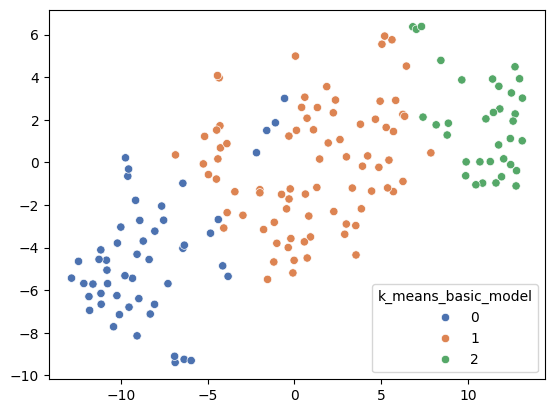

In [148]:
# t-SNE for cluster visulaization

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)

sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df["k_means_basic_model"], palette="deep")
plt.show()

In [149]:
polar = scaled_df[num_cols].groupby(df['k_means_pca_model']).mean().reset_index()
polar = pd.melt(polar, id_vars=["k_means_pca_model"])


import plotly.express as px

"""
  'polar' : dataset we are using
  'r' :  mean values for each feature which will be connected using lines
  'theta' : variables where each of the feature will have an angle and
            color will be based on the label of the clusters.
"""
fig = px.line_polar(polar, r="value", theta="variable", color="k_means_pca_model", line_close=True,height=700,width=800)
fig.show()

In [150]:
silhouette_score(X, df["k_means_pca_model"]), silhouette_score(X, df["k_means_basic_model"])

(0.28834317224946104, 0.28989704735108585)

In [151]:
silhouette_score(df[num_cols], df["k_means_pca_model"]), silhouette_score(df[num_cols], df["k_means_basic_model"])

(0.2892848461439414, 0.2850388067965035)

Both PCA-transformed and standardized features yielded comparable model performance. For simplicity, the K-Means model trained on standardized features is preferred.

# Final Model Selection:

1. Clustering Analysis and Model Selection

- After careful consideration of various clustering algorithms and feature engineering techniques, K-Means clustering with three clusters emerged as the optimal choice for our dataset.

2. Key Considerations:

- Model Performance: Both PCA-transformed and standardized features yielded comparable model performance. However, the K-Means model trained on standardized features offered a simpler approach without compromising accuracy.
- Cluster Interpretability: K-Means provided clear and interpretable clusters, facilitating actionable insights.
- Computational Efficiency: K-Means is computationally efficient, making it suitable for large datasets.
While other algorithms like DBSCAN and Hierarchical Clustering were explored, K-Means offered a balance of simplicity, performance, and interpretability.

*The GMM model yielded similar performance but was not selected due to its parametric nature.*




In [152]:
df.drop(columns=["AgglomerativeClustering", "DBSCAN"], inplace=True)

In [153]:
df.drop(columns = ['k_means_basic_model', 'k_means_pca_model'], inplace = True)

# Final model

In [169]:
import pickle
import random

num_cols = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'exports_per_capita',
       'imports_per_capita', 'health_spending', 'High_Child_Mortality',
       'low_Life_Expectancy', 'ratio_export_import',
       'inflation_adjusted_gdpp']


np.random.seed(42)
random.seed(42)

X_train = df.copy()
scaler = StandardScaler()
scaler.fit(df[num_cols])
X_train[num_cols] = scaler.transform(df[num_cols])


# Save the Std Scaler
with open('artifacts/scaler.pkl', 'wb') as f:
     pickle.dump(scaler, f)
     
     
# Train the model on X_train but only num_cols
model = KMeans(n_clusters = 3, random_state= 42)
model.fit(X_train[num_cols])


# Save the model
with open('artifacts/model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [163]:
df[num_cols].groupby(df["Class"]).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exports_per_capita,imports_per_capita,health_spending,High_Child_Mortality,low_Life_Expectancy,ratio_export_import,inflation_adjusted_gdpp
Class,,,,,,,,,,,,,,,,
0,15.105000,43.171667,6.574667,46.893333,15598.000000,6.752933,74.870000,2.051333,8238.333333,3833.668333,3797.642667,526.880417,0.166667,0.166667,0.966383,2177.121861
1,70.218056,31.356944,5.951250,44.236111,4645.138889,9.339722,63.029167,4.210833,2173.180556,922.107319,983.692903,121.511265,0.986111,1.000000,0.767108,296.071771
2,5.271429,49.340000,8.779143,44.994286,39165.714286,2.688800,79.905714,1.767429,38702.857143,19361.457143,16204.120000,3413.484857,0.000000,0.000000,1.130220,18182.777292


In [166]:
df[df["Class"]  == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exports_per_capita,imports_per_capita,health_spending,High_Child_Mortality,low_Life_Expectancy,ratio_export_import,inflation_adjusted_gdpp,Class
0,Afghanistan,90.2,12.0,7.58,44.9,1610,9.440,56.2,5.82,553,67.560,248.297,41.9174,1,1,0.267261,52.969349,1
3,Angola,116.0,62.3,2.85,42.9,5900,20.900,60.1,5.87,3530,2199.190,1514.370,100.6050,1,1,1.452214,161.187215,1
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,121.280,168.900,26.6816,1,1,0.733945,93.120393,1
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,180.404,281.976,31.0780,1,1,0.639785,402.122016,1
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.990,72.1,2.38,2180,926.500,1541.260,113.3600,1,1,0.601132,311.874106,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Uganda,81.0,17.1,9.01,28.6,1540,10.600,56.8,5.87,595,101.745,170.170,53.6095,1,1,0.597902,51.293103,1
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.500,68.8,2.34,1380,437.460,393.300,80.1780,1,1,1.112281,78.857143,1
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.620,63.0,3.50,2970,1384.020,1565.190,155.9250,1,1,0.884250,820.441989,1
165,Yemen,56.3,30.0,5.18,34.4,4480,20.900,67.5,4.67,1310,393.000,450.640,67.8580,1,1,0.872093,59.817352,1


In [165]:
df[["country", "income", "Class"]]

,country,income,Class
0,Afghanistan,1610,1
1,Albania,9930,0
2,Algeria,12900,0
3,Angola,5900,1
4,Antigua and Barbuda,19100,0
...,...,...,...
162,Vanuatu,2950,1
163,Venezuela,16500,0
164,Vietnam,4490,0
165,Yemen,4480,1
